1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [303]:
import pandas as pd
openrank = pd.read_csv('data\\2023_6\\open_rank_20236.csv')

max = openrank['value'].max()
min = openrank['value'].min()
mean = openrank['value'].mean()
median = openrank['value'].median()

print('最大值：', max)
print('最小值：', min)
print('平均值：', mean)
print('中位数：', median)


最大值： 1394.45
最小值： 200.68
平均值： 346.9679
中位数： 273.66999999999996


2. 读取data中2022文件夹下的activity_2022文件，分析美国排名前十的项目的平均增长率。

In [304]:
df = pd.read_csv('data\\2022\\activity_2022.csv')

# pct_change快速计算时间序列数据的百分比变化，axis=1计算多列数据之间的横向变化率
growth_rates = df.loc[:, '20221_value':'202212_value'].pct_change(axis=1) * 100

df['平均增长率'] = growth_rates.mean(axis=1)

print(df[['repo', '平均增长率']])
print('总平均增长率：', df['平均增长率'].mean())

                                     repo      平均增长率
0                MicrosoftDocs/azure-docs  -1.792781
1                           NixOS/nixpkgs   0.029453
2                          dotnet/runtime  -2.284829
3                          elastic/kibana  -0.365071
4  firstcontributions/first-contributions  14.082374
5                         flutter/flutter  -1.240426
6                     home-assistant/core   0.845268
7                        microsoft/vscode   2.290469
8                         pytorch/pytorch   1.316038
9                          rust-lang/rust  -0.377805
总平均增长率： 1.2502691855077122


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

中国和全球开源领域企业各种指标数据的各种统计量的可视化对比：


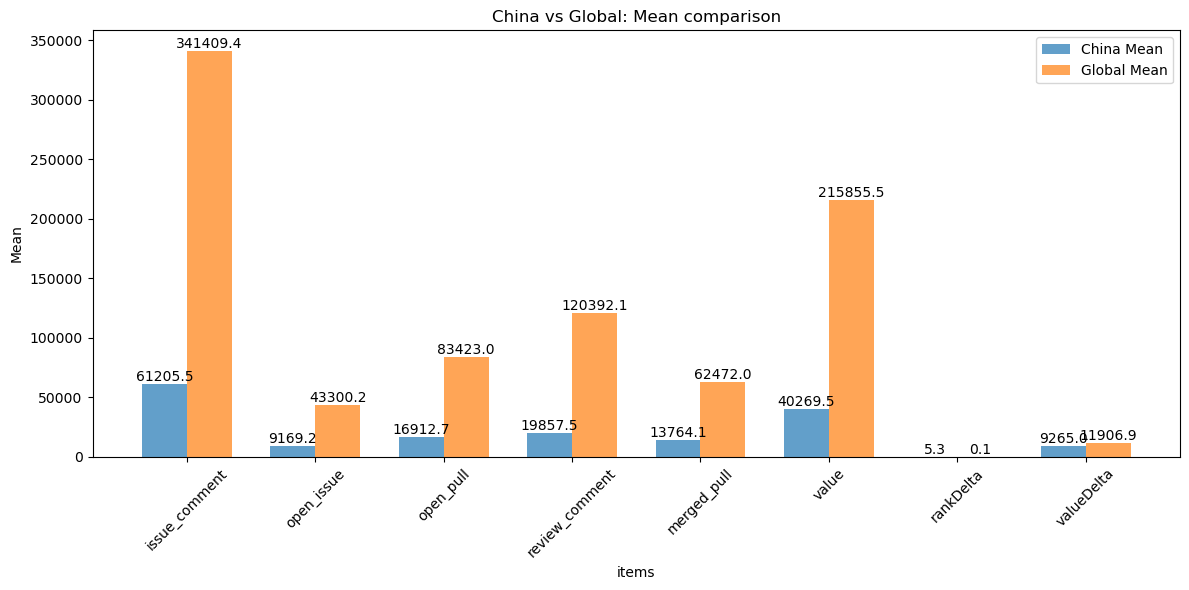

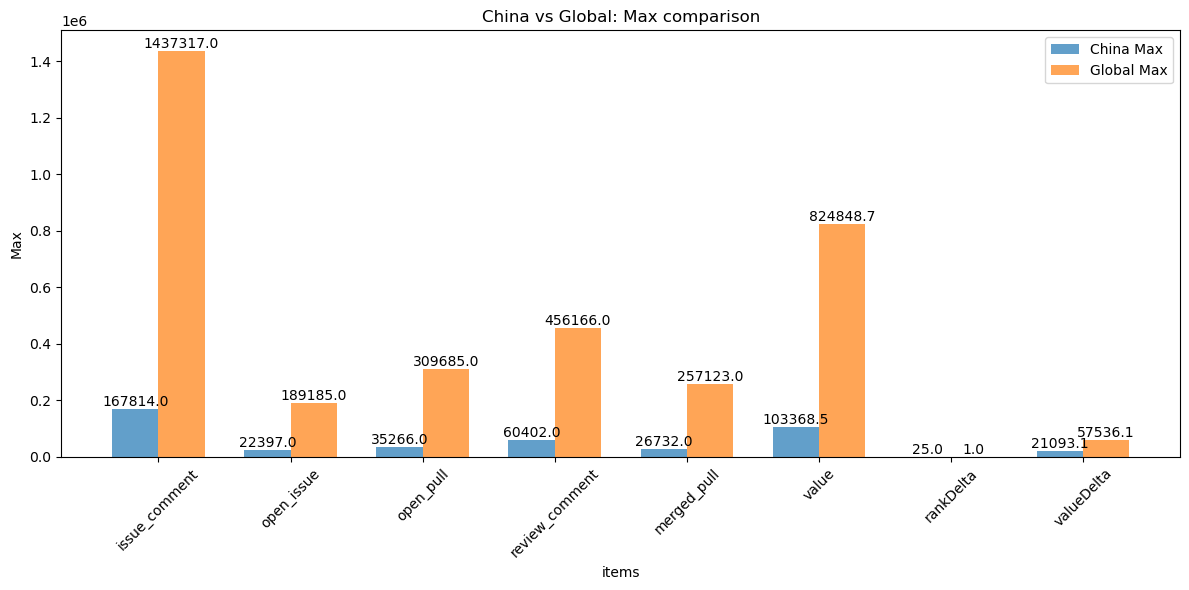

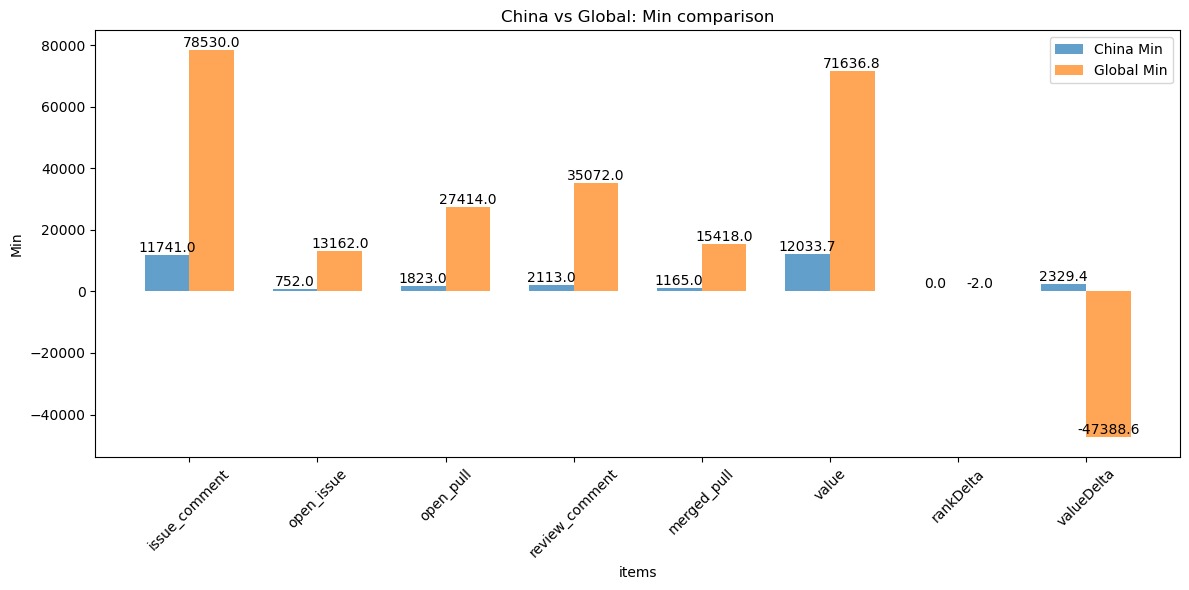

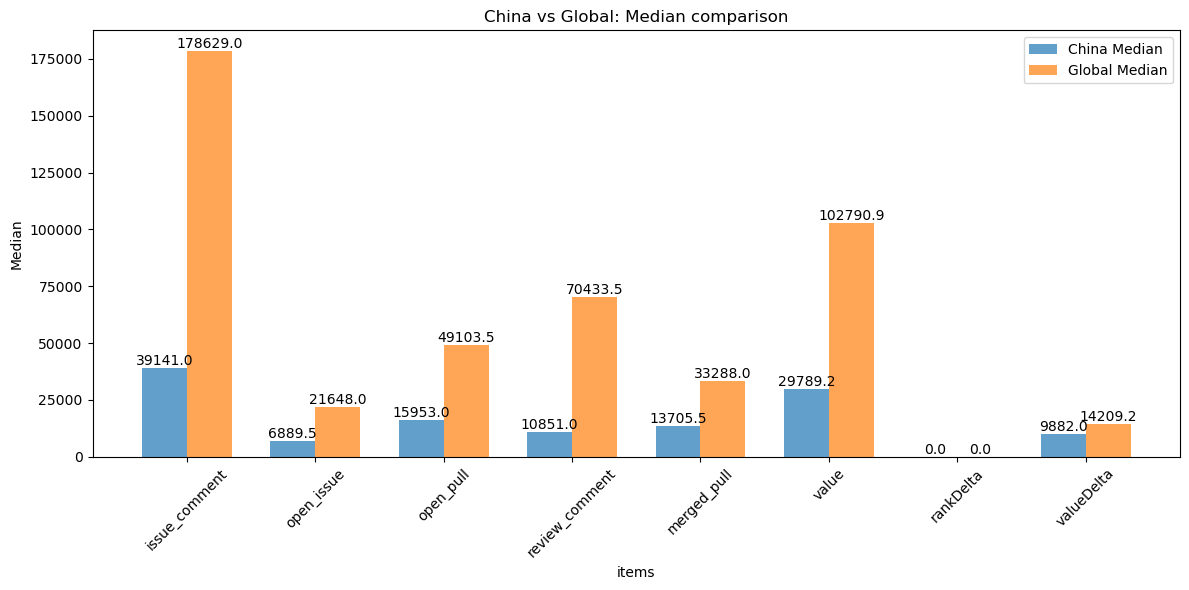

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

china_df = pd.read_csv('data/2022/china_2022.csv')
global_df = pd.read_csv('data/2022/global_2022.csv')

columns_to_analyze = ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'value', 'rankDelta', 'valueDelta']

# 计算china的各种统计数据   agg()函数可以同时计算多个统计指标
china_stats = china_df[columns_to_analyze].agg(['mean', 'max', 'min', 'median']).transpose()
china_stats.columns = ['China_Mean', 'China_Max', 'China_Min', 'China_Median']

# 计算global的各种统计数据  agg()函数可以同时计算多个统计指标
global_stats = global_df[columns_to_analyze].agg(['mean', 'max', 'min', 'median']).transpose()
global_stats.columns = ['Global_Mean', 'Global_Max', 'Global_Min', 'Global_Median']

# 将中国和全球的统计数据合并到一个DataFrame中
# concat()函数可以将两个DataFrame按列合并
comparison_stats = pd.concat([china_stats, global_stats], axis=1)

print("中国和全球开源领域企业各种指标数据的各种统计量的可视化对比：")

# 调整可视化代码，将每个指标的中国和全球数据分为两列，以便清晰展示
for stat in ['Mean', 'Max', 'Min', 'Median']:
    plt.figure(figsize=(12, 6))
    
    # 获取中国和全球的数据
    china_values = comparison_stats[f'China_{stat}']
    global_values = comparison_stats[f'Global_{stat}']
    metrics = comparison_stats.index

    # 定义柱状图的宽度和位置
    bar_width = 0.35
    index = np.arange(len(metrics))

    # 绘制并排的条形图
    china_bars = plt.bar(index, china_values, bar_width, label=f'China {stat}', alpha=0.7)
    global_bars = plt.bar(index + bar_width, global_values, bar_width, label=f'Global {stat}', alpha=0.7)

    # 为每个条形添加数值标签
    for bar in china_bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')
    
    for bar in global_bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')

    # 设置图表的标签和标题
    plt.xlabel('items')
    plt.ylabel(stat)
    plt.title(f'China vs Global: {stat} comparison')
    plt.xticks(index + bar_width / 2, metrics, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

- 事件A: 一个项目是软件型项目;
- 事件B: 一个项目带有HTML/Markdown标签.
$$ 
P(A) = 0.25, P(\bar{A}) = 0.75; P(B|A) = 0.10, P(B|\bar{A}) = 0.85. \\
由贝叶斯定理，\\
P(\bar{A}|B) = \frac{P(\bar{A})P(B|\bar{A})}{P(B)} = \frac{P(\bar{A})P(B|\bar{A})}{P(A)P(B|A) + P(\bar{A})P(B|\bar{A})} = \frac{0.6375}{0.025+0.6375} = 0.962.
$$



5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

- 事件C: 一个项目是工具组件型项目;
- 事件D: 一个项目是由JS编写的.
$$
P(C) = 0.50, P(\bar{C}) = 0.50; P(D|C) = 0.35, P(D|\bar{C}) = 0.10.\\
由贝叶斯定理，\\
P(C|D) = \frac{P(C)P(D|C)}{P(D)} = \frac{P(C)P(D|C)}{P(C)P(D|C)+P(\bar{C})P(D|\bar{C})} = \frac{0.175}{0.175+0.05} = 0.778.
$$

6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

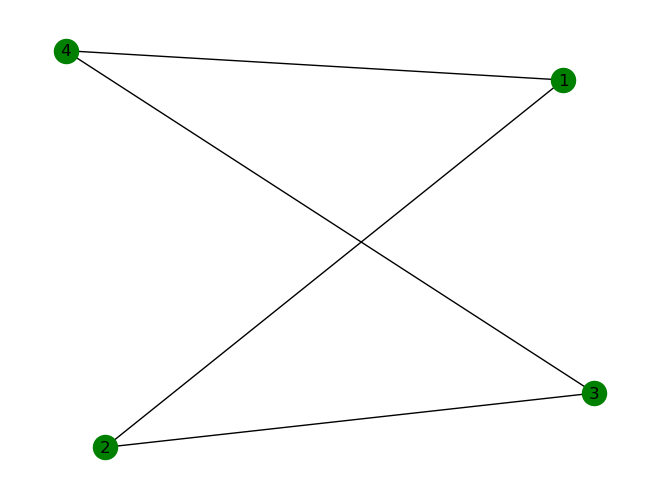

In [306]:
nodes = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

# 建立可视化无向图
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

for node in nodes:
    G.add_node(node)
G.add_edges_from(edges)
nx.draw(G, with_labels=True, node_color='green')
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

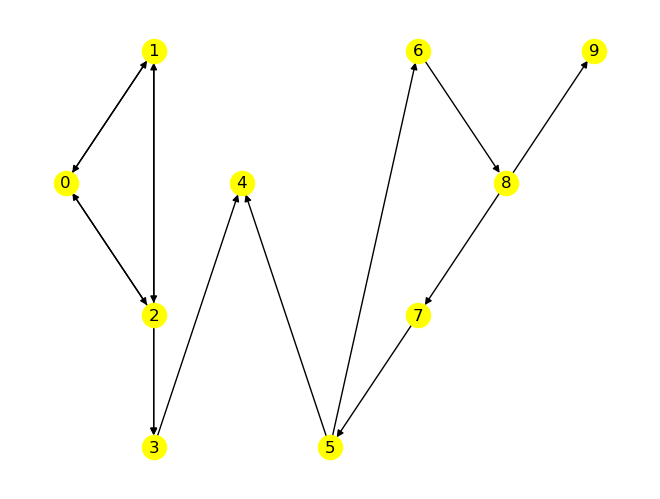

In [307]:
nodes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
            (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
            (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
# 建立可视化有向图
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

for node in nodes:
    G.add_node(node)
G.add_edges_from(edges)

# 节点较多时可以指定节点位置
pos = [(1, 3), (2, 4), (2, 2),  (2, 1),  (3, 3),  (4, 1),  (5, 4),  (5, 2),  (6, 3), (7, 4)] 

nx.draw(G, pos, with_labels=True, node_color='yellow')
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

经过 29 迭代后得到结果


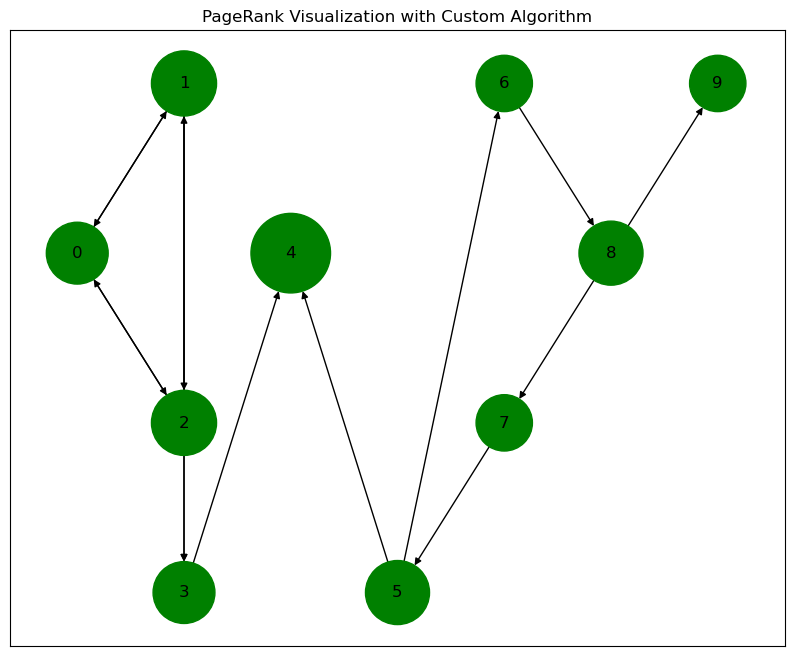

In [308]:
# 初始化参数
d = 0.85  # 阻尼系数
N = len(G.nodes())  # 节点总数
max_iter = 100  # 最大迭代次数
tol = 1e-6  # 收敛的阈值

# 初始化每个节点的 PageRank 值为 1/N
pagerank = {node: 1 / N for node in G.nodes()}

# 开始迭代计算 PageRank 值
for i in range(max_iter):
    new_pagerank = {}
    for node in G.nodes():
        # 计算从其他节点传递到当前节点的 PageRank 值之和
        rank_sum = 0
        for neighbor in G.predecessors(node):  # predecessors() 返回指向该节点的节点集合
            rank_sum += pagerank[neighbor] / G.out_degree(neighbor)

        # 计算当前节点的新的 PageRank 值
        new_pagerank[node] = (1 - d) / N + d * rank_sum

    # 检查是否收敛
    diff = sum(abs(new_pagerank[node] - pagerank[node]) for node in G.nodes())
    pagerank = new_pagerank
    if diff < tol:
        print(f"经过 {i + 1} 迭代后得到结果")
        break
else:
    print("迭代次数过高。")

# log缩放节点大小
node_sizes = [np.log(pagerank[node] + 1)  * 50000  for node in G.nodes()]

# 可视化 PageRank 结果
plt.figure(figsize=(10, 8))
pos = [(1, 3), (2, 4), (2, 2),  (2, 1),  (3, 3),  (4, 1),  (5, 4),  (5, 2),  (6, 3), (7, 4)] 
nx.draw_networkx(
    G, 
    pos, 
    with_labels=True, 
    node_size=node_sizes, 
    node_color='green', 
)
plt.title("PageRank Visualization with Custom Algorithm")
plt.show()